# Classification of the CIFAR-10 Dataset

[Wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) says the **CIFAR-10 dataset** is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. 

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [1]:
# Download data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


We now take a look at the shape of the training and testing datasets. 

In [2]:
# Shape of the datasets
print('The size of the x_training set:', x_train.shape)
print('The size of the y_training set:', y_train.shape)
print('The size of the x_texting set:', x_test.shape)
print('The size of the y_texting set:', y_test.shape)

The size of the x_training set: (50000, 32, 32, 3)
The size of the y_training set: (50000, 1)
The size of the x_texting set: (10000, 32, 32, 3)
The size of the y_texting set: (10000, 1)


We now look at the first image in our training set to see how it looks.

In [3]:
# First image of the training set
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

We now show the image we just observed in matrix form.

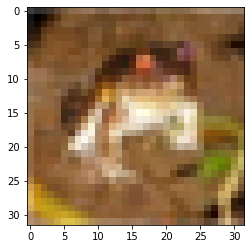

In [5]:
# First image shown of the dataset
import matplotlib.pyplot as plt ### library and package needed to show image
img = plt.imshow(x_train[0])
img

Let's now look at the label of this training set image.

In [6]:
# Label of the image shown
print('The label of the above image is', y_train[0])

The label of the above image is [6]


We now convert the test and training target labels using one-hot encoding. This will allow ease of prediction without skewing the data. We follow this by observing the new target training set.

In [7]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Observe the labels of the one-hot training set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Let's now observe the first image of the training set. Our observation should show the number 1 at position (1,7) of the matrix, since our original label was 6.

In [8]:
print('The label in one-hot form is', y_train_one_hot[0])

The label in one-hot form is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


We now want to normalize the training and testing data so that our pixel value is between 0 and 1. We know that the values for color images range between 0 and 255, inclusive. Let's now observe how the data looks.

In [9]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

#View the first image data normalized
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


## Basic Convolution Neural Network #1

We are now going to build the architecture of the Neural Network model to make the prediction. This is a basic Convolution Neural Network below.

In [10]:
# Import library for model in Keras to build the CNN
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Create the architecture
model = Sequential()

# Build CNN layer
model.add(Conv2D(32, (5,5), activation = "relu", input_shape = (32,32,3)))

# Build MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Build CNN layer
model.add(Conv2D(32, (5,5), activation = "relu"))

# Build MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten the data
model.add(Flatten())
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [11]:
# Compile the model
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Training the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.30)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.7112 - accuracy: 0.3838 - val_loss: 1.5348 - val_accuracy: 0.4439
Epoch 2/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.3758 - accuracy: 0.5073 - val_loss: 1.3407 - val_accuracy: 0.5233
Epoch 3/10
35000/35000 [==============================] - 48s 1ms/step - loss: 1.2301 - accuracy: 0.5627 - val_loss: 1.2341 - val_accuracy: 0.5643
Epoch 4/10
35000/35000 [==============================] - 48s 1ms/step - loss: 1.1128 - accuracy: 0.6069 - val_loss: 1.1304 - val_accuracy: 0.6081
Epoch 5/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.0334 - accuracy: 0.6349 - val_loss: 1.1002 - val_accuracy: 0.6179
Epoch 6/10
35000/35000 [==============================] - 49s 1ms/step - loss: 0.9561 - accuracy: 0.6628 - val_loss: 1.0417 - val_accuracy: 0.6395
Epoch 7/10
35000/35000 [==============================] - 48s 1ms/st

We are now going to see the models accuracy.

In [13]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 6s 557us/step


0.6753000020980835

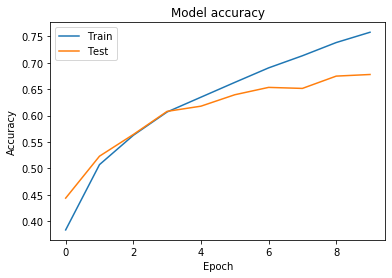

In [16]:
# Visualize the accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

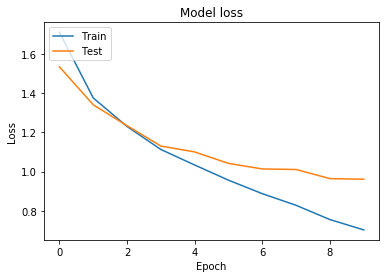

In [17]:
# Visualize the loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we can see here, the accuracy is a little over 67%. I want to experiment with the Epochs of the model to improve accuracy. 

## Basic Convolution Neural Network #2

For this model, I kept the layers the same from Model 1. I am not adding 5 epochs to this model to see if there is any improvement in the model.

In [1]:
# Import data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train/255
x_test = x_test/255

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [3]:
# Import library for model in Keras to build the CNN
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Create the architecture
model = Sequential()

# Build CNN layer
model.add(Conv2D(32, (5,5), activation = "relu", input_shape = (32,32,3)))

# Build MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Build CNN layer
model.add(Conv2D(32, (5,5), activation = "relu"))

# Build MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten the data
model.add(Flatten())
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [4]:
# Compile the model
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# Training the model
hist2 = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=15, validation_split=0.30)

Train on 35000 samples, validate on 15000 samples
Epoch 1/15
35000/35000 [==============================] - 55s 2ms/step - loss: 1.6697 - accuracy: 0.3969 - val_loss: 1.4849 - val_accuracy: 0.4703
Epoch 2/15
35000/35000 [==============================] - 52s 1ms/step - loss: 1.3475 - accuracy: 0.5171 - val_loss: 1.2898 - val_accuracy: 0.5433
Epoch 3/15
35000/35000 [==============================] - 54s 2ms/step - loss: 1.2226 - accuracy: 0.5685 - val_loss: 1.2336 - val_accuracy: 0.5601
Epoch 4/15
35000/35000 [==============================] - 53s 2ms/step - loss: 1.1335 - accuracy: 0.5993 - val_loss: 1.1732 - val_accuracy: 0.5822
Epoch 5/15
35000/35000 [==============================] - 54s 2ms/step - loss: 1.0500 - accuracy: 0.6295 - val_loss: 1.0915 - val_accuracy: 0.6174
Epoch 6/15
35000/35000 [==============================] - 48s 1ms/step - loss: 0.9683 - accuracy: 0.6609 - val_loss: 1.0811 - val_accuracy: 0.6207
Epoch 7/15
35000/35000 [==============================] - 60s 2ms/st

In [6]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 18s 2ms/step


0.6653000116348267

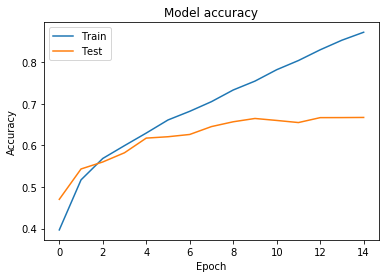

In [9]:
# Visualize the accuracy
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

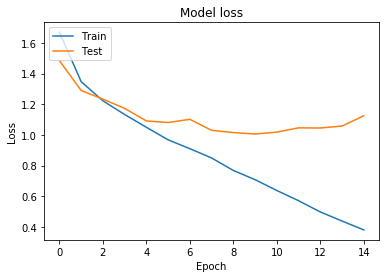

In [11]:
# Visualize the loss

plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()